In [1]:
# Import libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Here are my rc parameters for matplotlib
mpl.rc('font', serif='Helvetica Neue') 
mpl.rcParams.update({'font.size': 9})
mpl.rcParams['figure.figsize'] = 3.2, 2.8
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 0.5

In [3]:
def find(name):
    home = os.path.expanduser("~")
    for root, dirs, files in os.walk(home):
        if name in dirs:
            return os.path.join(root, name)

In [4]:
# First let's find all of our data
whingPath = find('whingdingdilly')
ipyPath = whingPath + '/ipython'
dataPath = ipyPath + '/all_data'

# Go to the correct parent directory
os.chdir(ipyPath)
txtFiles = os.listdir(dataPath)
numFiles = len(txtFiles)

In [5]:
# Functions to sort my data with
def getFromTxt(fname, first, last):
    """Takes a string, text before and after desired text, outs text between"""
    start = fname.index( first ) + len( first )
    end = fname.index( last, start )
    myTxt = fname[start:end]
    return float(myTxt)
        
def multiSort(arr1, arr2, arr3):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    # Doing this for PeR, PeS, xS in this case
    cpy1 = np.copy(arr1)
    cpy2 = np.copy(arr2)
    cpy3 = np.copy(arr3)
    ind = np.arange(0, len(arr1))
    for i in xrange(len(cpy1)):
        for j in xrange(len(cpy1)):
            # Sort by first variable
            if cpy1[i] > cpy1[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            # If first variable is equal, resort to second variable
            elif cpy1[i] == cpy1[j] and cpy2[i] > cpy2[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] > cpy3[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]      
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in xrange(len(arr1)):
        arr1[i] = cpy[arr2[i]]

In [6]:
# You want to load the data in so that it's sorted to begin with
paList = []
pbList = []
prList = []
xaList = []
for i in xrange(numFiles):
    paList.append(getFromTxt(txtFiles[i], "pa", "_pb"))
    pbList.append(getFromTxt(txtFiles[i], "pb", "_xa"))
    xaList.append(getFromTxt(txtFiles[i], "xa", "_ep"))
    # We want to use ratios rounded to nearest 0.05
    try:
        tmpPeR = round(paList[i]/pbList[i] * 2, 1) / 2
    except:
        tmpPeR = 1.0
    prList.append(tmpPeR)
    
# Now sort the array of txtFile names
indArr = multiSort(prList, paList, xaList)
indSort(txtFiles, indArr)

In [7]:
# Read in the data in pandas dataframes
all_sims = []
os.chdir(dataPath)
for i in xrange(numFiles):
    df = pd.read_csv(txtFiles[i], sep='\s+', header=0)
    all_sims.append(df)
    
# Return to root directory
os.chdir(ipyPath)

In [8]:
# Make sure all data is chronilogical
def chkSort(array):
    """Make sure array is chronilogical"""
    for i in xrange(len(array)-2):
        if array[i] > array[i+1]:
            print("{} is not greater than {} for indices=({},{})").format(array[i+1], array[i], i, i+1)
            return False
    return True

# Check to see if timesteps are in order
for i in xrange(numFiles):
    myBool = chkSort(all_sims[i]['Timestep'])
    if myBool is False:
        print("{} is not chronilogically sorted!").format(txtFiles[i])
        exit(1)
    else:
        print("{} sorted... ").format(txtFiles[i])

diam_pa0_pb500_xa10_ep82.txt sorted... 
diam_pa0_pb500_xa20_ep82.txt sorted... 
diam_pa0_pb500_xa30_ep82.txt sorted... 
diam_pa0_pb500_xa40_ep82.txt sorted... 
diam_pa0_pb500_xa50_ep82.txt sorted... 
diam_pa0_pb500_xa60_ep82.txt sorted... 
diam_pa0_pb500_xa70_ep82.txt sorted... 
diam_pa0_pb500_xa80_ep82.txt sorted... 
diam_pa0_pb500_xa90_ep82.txt sorted... 
diam_pa10_pb100_xa50_ep18.txt sorted... 
diam_pa20_pb200_xa50_ep34.txt sorted... 
diam_pa30_pb300_xa50_ep50.txt sorted... 
diam_pa40_pb400_xa50_ep66.txt sorted... 
diam_pa50_pb500_xa50_ep82.txt sorted... 
diam_pa60_pb600_xa50_ep98.txt sorted... 
diam_pa70_pb700_xa50_ep114.txt sorted... 
diam_pa80_pb800_xa50_ep130.txt sorted... 
diam_pa90_pb900_xa50_ep146.txt sorted... 
diam_pa100_pb1000_xa50_ep162.txt sorted... 
diam_pa110_pb1100_xa50_ep178.txt sorted... 
diam_pa120_pb1200_xa50_ep194.txt sorted... 
diam_pa130_pb1300_xa50_ep210.txt sorted... 
diam_pa140_pb1400_xa50_ep226.txt sorted... 
diam_pa150_pb1500_xa50_ep242.txt sorted... 
diam

diam_pa80_pb88_xa50_ep16.txt sorted... 
diam_pa90_pb100_xa50_ep18.txt sorted... 
diam_pa100_pb111_xa50_ep19.txt sorted... 
diam_pa110_pb122_xa50_ep21.txt sorted... 
diam_pa120_pb133_xa50_ep23.txt sorted... 
diam_pa130_pb144_xa50_ep25.txt sorted... 
diam_pa140_pb155_xa50_ep26.txt sorted... 
diam_pa150_pb166_xa50_ep28.txt sorted... 
diam_pa450_pb500_xa50_ep82.txt sorted... 
diam_pa0_pb0_xa100_ep1.txt sorted... 
diam_pa50_pb0_xa100_ep10.txt sorted... 
diam_pa100_pb0_xa100_ep18.txt sorted... 
diam_pa150_pb0_xa100_ep26.txt sorted... 
diam_pa200_pb0_xa100_ep34.txt sorted... 
diam_pa250_pb0_xa100_ep42.txt sorted... 
diam_pa300_pb0_xa100_ep50.txt sorted... 
diam_pa350_pb0_xa100_ep58.txt sorted... 
diam_pa400_pb0_xa100_ep66.txt sorted... 
diam_pa450_pb0_xa100_ep74.txt sorted... 
diam_pa500_pb500_xa50_ep82.txt sorted... 
diam_pa500_pb0_xa100_ep82.txt sorted... 


In [9]:
# Add a column to the all_sims dataframe for number of clusters (of threshold size):
for i in xrange(numFiles):
    # New column for number of clusters
    all_sims[i]['nClust'] = all_sims[i]['Dense_tot'] / all_sims[i]['MCS']
    # Ger rid of NaN in favor of 0
    all_sims[i].fillna(0, inplace=True)

# display(all_sims[0])

In [10]:
# Function that will sort wrt one variable
def singleSort(arr):
    for i in xrange(len(arr)):
        for j in xrange(len(arr)):
            if arr[i] < arr[j] and i > j:
                arr[i], arr[j] = arr[j], arr[i]
                
# Function to get conversion from timesteps to Brownian time
def computeTauPerTstep(epsilon):
    # This is actually indpendent of runtime :)
#     sigma = 1.0
#     threeEtaPiSigma = 1.0
#     runFor = 200
#     tauBrown = 1.0
    
#     tauLJ = ((sigma**2) * threeEtaPiSigma) / epsilon
#     dt = 0.00001 * tauLJ
#     simLength = runFor * tauBrown
#     totTsteps = int(simLength / dt)
#     tstepPerTau = int(totTsteps / float(simLength))
    kBT = 1.0
    tstepPerTau = int(epsilon / (kBT * 0.00001))
    return tstepPerTau

def theoryDenom(xS, peS, peF):
    xS /= 100.0
    xF = 1.0 - xS
    return 4.0 * ((xS * peS) + (xF * peF))

def theory(xS, peS, peF):
    kappa = 4.05
    xS /= 100.0
    xF = 1.0 - xS
    return ((3.0 * (np.pi**2) * kappa) / (4.0 * ((xS * peS) + (xF * peF))))

# Make an additional frame that gives total number of particles, and simulation parameters
paramList = []
for i in xrange(numFiles):
    partAll = all_sims[i]['Gas_tot'][0]
    partA = all_sims[i]['Gas_A'][0]
    partB = all_sims[i]['Gas_B'][0]
    pa = getFromTxt(txtFiles[i], "pa", "_pb")
    pb = getFromTxt(txtFiles[i], "pb", "_xa")
    xa = getFromTxt(txtFiles[i], "xa", "_ep")
    ep = getFromTxt(txtFiles[i], "ep", ".txt")
    converT = computeTauPerTstep(ep)
    mytheoryDenom = theoryDenom(xa, pa, pb)
    if pa != 0 or pb != 0: 
        mytheory = theory(xa, pa, pb)
    else:
        mytheory = 0.0
    
    # This is monodisperse
    if pb == 0 and xa == 100:
        prat = 1.0
        
    # This is active/passive
    elif pb == 0 and xa != 100:
        prat = 0.0
        
    # Everything else
    else:
        # Round to the nearest tenths place
        prat = round(float(pa)/float(pb) * 2, 1) / 2

    paramList.append((partAll, partA, partB, pa, pb, xa, prat, ep, converT, mytheoryDenom, mytheory))

params = pd.DataFrame(paramList, columns=['partAll', 'partA', 'partB', 'peA',
                                          'peB', 'xA', 'peR', 'eps', 'brownTime',
                                          'theoryDenom', 'theory'])
pd.set_option('display.max_rows', 2)
display(params)

partAll   partA  partB    peA    peB     xA  peR   eps  brownTime  \
0     100000   10000  90000    0.0  500.0   10.0  0.0  82.0    8199999   
..       ...     ...    ...    ...    ...    ...  ...   ...        ...   
220   100000  100000      0  500.0    0.0  100.0  1.0  82.0    8199999   

     theoryDenom    theory  
0         1800.0  0.066620  
..           ...       ...  
220       2000.0  0.059958  

[221 rows x 11 columns]

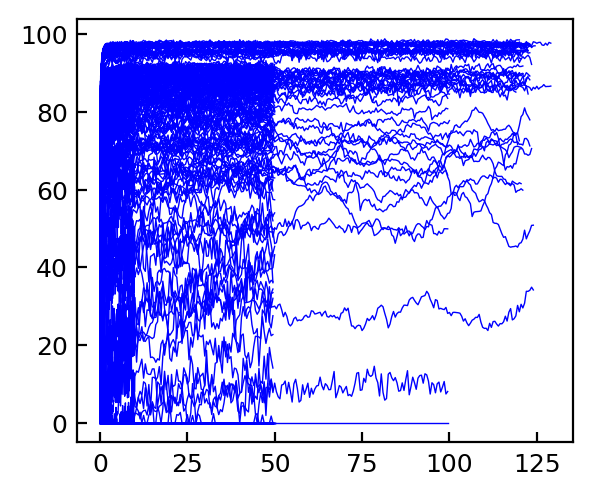

In [11]:
# Make sure I haven't messed up my data
for i in xrange(numFiles):
    plt.plot(all_sims[i]['Timestep'][:] / params['brownTime'][i],
             all_sims[i]['Dense_A'][:] / params['partA'][i] * 100.0,
             c='b',
             label=str(params['peR'][i]))
plt.show()

Number of textfiles before delete: 221
Number of all_sims dataframes before delete: 221
Params rows before delete: 221
Number of textfiles after delete: 216
Number of all_sims dataframes after delete: 216
Params rows after delete: 216


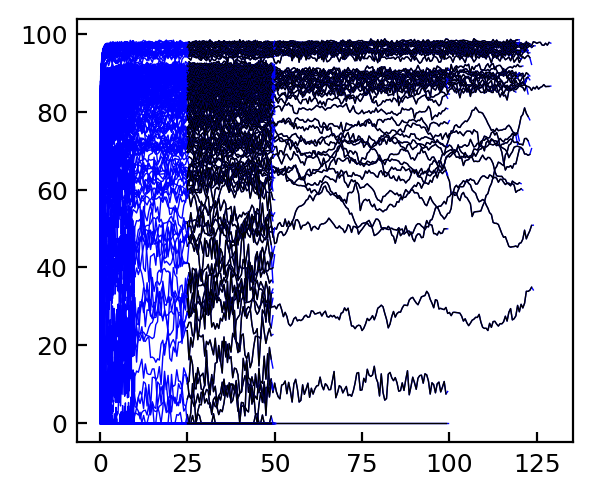

In [12]:
# Figure out how what we should use for steady-state
numFiles = len(txtFiles)
# We should average past a specific time, not an index number...
ssStartTime = 25.0
ssStartInd = []
badFiles = []
# Get indices for files which aren't at steady-state
for i in xrange(numFiles):
    if all_sims[i]['Timestep'].iloc[-1] / params['brownTime'][i] >= ssStartTime:
        for j in xrange(len(all_sims[i]['Timestep'])):
            if all_sims[i]['Timestep'][j] / params['brownTime'][i] >= ssStartTime:
                ssStartInd.append(j)
                break
    else:
        badFiles.append(i)

# Delete rows of dataframe
# Remove these indices from: txtFiles, all_sims, params
print("Number of textfiles before delete: {}").format(len(txtFiles))
print("Number of all_sims dataframes before delete: {}").format(len(all_sims))
print("Params rows before delete: {}").format(len(params['partAll']))
if badFiles:
    # You have to reverse the order so that you don't mess up your indexing
    for myindex in sorted(badFiles, reverse=True):
        del txtFiles[myindex]
        del all_sims[myindex]
        params.drop(params.index[myindex], inplace=True)  
print("Number of textfiles after delete: {}").format(len(txtFiles))
print("Number of all_sims dataframes after delete: {}").format(len(all_sims))
print("Params rows after delete: {}").format(len(params['partAll']))

# You have to reindex the dataframe
params.index = range(len(params['partAll']))
numFiles = len(txtFiles)

# Visual check to see if this is the appropriate time window for steady-state
for i in xrange(numFiles):
    plt.plot(all_sims[i]['Timestep'][:] / params['brownTime'][i],
             all_sims[i]['Dense_A'][:] / params['partA'][i] * 100.0,
             c='b',
             label=str(params['peR'][i]))
    plt.plot(all_sims[i]['Timestep'][ssStartInd[i]:-1] / params['brownTime'][i],
             all_sims[i]['Dense_A'][ssStartInd[i]:-1] / params['partA'][i] * 100.0,
             c='k')
plt.show()

In [13]:
# Get lists for distinct values that I might want to plot
distPeR = []
for i in xrange(numFiles):
    if params['peR'][i] not in distPeR:
        distPeR.append(params['peR'][i])
singleSort(distPeR)
print(distPeR)

distxA = []
for i in xrange(numFiles):
    if params['xA'][i] not in distxA:
        distxA.append(params['xA'][i])
singleSort(distxA)
print(distxA)

[0.0, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 1.0]
[10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]


In [14]:
# Now get time-based steady state values

# Make list of steady state column headers
headers = list(all_sims[0])
headers.remove('Timestep')
SS = pd.DataFrame(columns=headers)
stdErr = pd.DataFrame(columns=headers)
var = pd.DataFrame(columns=headers)
# Initialize dataframes
for i in xrange(numFiles):
    SS.loc[i] = [0] * len(headers)
    stdErr.loc[i] = [0] * len(headers)
    var.loc[i] = [0] * len(headers)
    
# Make dataframe of steady-state data
for i in xrange(numFiles):
    # Loop through each column (aside from tstep column)
    for j in range(1, len(all_sims[i].iloc[1])):
        # Compute mean of data after steady-state time (25tb) in jth column of ith file
        avg = np.mean(all_sims[i].iloc[ssStartInd[i]:-1, j])
        SS[headers[j-1]][i] = avg
        # Compute the standard deviation and variance in this data
        stdError = np.std(all_sims[i].iloc[ssStartInd[i]:-1, j])
        stdErr[headers[j-1]][i] = stdError
        var[headers[j-1]][i] = stdError ** 2
        
# Normalize by number of particles
for i in xrange(len(txtFiles)):
    if params['partA'][i] != 0:
        SS['Gas_A'][i] /= params['partA'][i]
        SS['Dense_A'][i] /= params['partA'][i]
        SS['Lc_numA'][i] /= params['partA'][i]
        # Now my standard error is a percentage
        stdErr['Gas_A'][i] /= params['partA'][i]
        stdErr['Dense_A'][i] /= params['partA'][i]
        stdErr['Lc_numA'][i] /= params['partA'][i]
        var['Gas_A'][i] /= params['partA'][i]
        var['Dense_A'][i] /= params['partA'][i]
        var['Lc_numA'][i] /= params['partA'][i]
        
    if params['partB'][i] != 0:
        SS['Gas_B'][i] /= params['partB'][i]
        SS['Dense_B'][i] /= params['partB'][i]
        SS['Lc_numB'][i] /= params['partB'][i]
        stdErr['Gas_B'][i] /= params['partB'][i]
        stdErr['Dense_B'][i] /= params['partB'][i]
        stdErr['Lc_numB'][i] /= params['partB'][i]
        var['Gas_B'][i] /= params['partB'][i]
        var['Dense_B'][i] /= params['partB'][i]
        var['Lc_numB'][i] /= params['partB'][i]

SS['Gas_tot'][:] /= params['partAll'][:]
SS['Dense_tot'][:] /= params['partAll'][:] 
SS['Lg_clust'][:] /= params['partAll'][:] 
SS['MCS'][:] /= params['partAll'][:]
stdErr['Gas_tot'][:] /= params['partAll'][:]
stdErr['Dense_tot'][:] /= params['partAll'][:] 
stdErr['Lg_clust'][:] /= params['partAll'][:] 
stdErr['MCS'][:] /= params['partAll'][:]
var['Gas_tot'][:] /= params['partAll'][:]
var['Dense_tot'][:] /= params['partAll'][:] 
var['Lg_clust'][:] /= params['partAll'][:] 
var['MCS'][:] /= params['partAll'][:]

SS['Gas_A'][:] *= 100.0
SS['Gas_B'][:] *= 100.0
SS['Gas_tot'][:] *= 100.0
SS['Dense_A'][:] *= 100.0
SS['Dense_B'][:] *= 100.0
SS['Dense_tot'][:] *= 100.0
SS['Lc_numA'][:] *= 100.0
SS['Lc_numB'][:] *= 100.0
SS['Lg_clust'][:] *= 100.0
SS['MCS'][:] *= 100.0
stdErr['Gas_A'][:] *= 100.0
stdErr['Gas_B'][:] *= 100.0
stdErr['Gas_tot'][:] *= 100.0
stdErr['Dense_A'][:] *= 100.0
stdErr['Dense_B'][:] *= 100.0
stdErr['Dense_tot'][:] *= 100.0
stdErr['Lc_numA'][:] *= 100.0
stdErr['Lc_numB'][:] *= 100.0
stdErr['Lg_clust'][:] *= 100.0
stdErr['MCS'][:] *= 100.0
var['Gas_A'][:] *= 100.0
var['Gas_B'][:] *= 100.0
var['Gas_tot'][:] *= 100.0
var['Dense_A'][:] *= 100.0
var['Dense_B'][:] *= 100.0
var['Dense_tot'][:] *= 100.0
var['Lc_numA'][:] *= 100.0
var['Lc_numB'][:] *= 100.0
var['Lg_clust'][:] *= 100.0
var['MCS'][:] *= 100.0
pd.set_option('display.max_rows', 2)
display(SS)
display(stdErr)
display(var)

Gas_A    Gas_B  Gas_tot  Dense_A  Dense_B Dense_tot  Lc_numA  Lc_numB  \
0    35.8124  2.53135  5.85945  64.1876  97.4687   94.1405  64.0828  97.3888   
..       ...      ...      ...      ...      ...       ...      ...      ...   
215  2.29463        0  2.29463  97.7054        0   97.7054  97.5887        0   

    Lg_clust      MCS   ...       sigAA    sigAB   sigBB phiEff lg_clustA  \
0    94.0582  91.4229   ...     1.00011  1.00009  1.0001    0.6   73887.7   
..       ...      ...   ...         ...      ...     ...    ...       ...   
215  97.5887  94.7121   ...     1.00005        0       0    0.6   76654.2   

    tot_clustA LC_density DP_density GP_density   nClust  
0      73952.3       1.27       1.27   0.103684   1.0579  
..         ...        ...        ...        ...      ...  
215    76745.8       1.27       1.27  0.0422449  1.06123  

[216 rows x 21 columns]

Gas_A     Gas_B   Gas_tot   Dense_A   Dense_B Dense_tot   Lc_numA  \
0      4.5971  0.431743  0.605488    4.5971  0.431743  0.605488      4.68   
..        ...       ...       ...       ...       ...       ...       ...   
215  0.368317         0  0.368317  0.368317         0  0.368317  0.595585   

      Lc_numB  Lg_clust      MCS    ...           sigAA       sigAB  \
0    0.578477  0.731024  11.0427    ...     0.000283676  0.00015734   
..        ...       ...      ...    ...             ...         ...   
215         0  0.595585  11.7078    ...     9.49802e-05           0   

           sigBB       phiEff lg_clustA tot_clustA   LC_density   DP_density  \
0    0.000102549  1.88738e-15   576.844    477.969   3.9968e-15   3.9968e-15   
..           ...          ...       ...        ...          ...          ...   
215            0  5.55112e-16   471.604    296.588  1.33227e-15  1.33227e-15   

     GP_density    nClust  
0     0.0103672  0.233547  
..          ...       ...  
215  0.00678092  0.239745  

[216 rows x 21 columns]

Gas_A    Gas_B  Gas_tot  Dense_A  Dense_B Dense_tot  Lc_numA  Lc_numB  \
0    2113.34  167.762  366.616  2113.34  167.762   366.616  2190.24  301.172   
..       ...      ...      ...      ...      ...       ...      ...      ...   
215  135.657        0  135.657  135.657        0   135.657  354.722        0   

    Lg_clust     MCS    ...            sigAA       sigAB        sigBB  \
0    534.397  121940    ...       8.0472e-08  2.4756e-08  1.05163e-08   
..       ...     ...    ...              ...         ...          ...   
215  354.722  137073    ...      9.02124e-09           0            0   

          phiEff lg_clustA tot_clustA   LC_density   DP_density   GP_density  \
0     3.5622e-30    332749     228454  1.59744e-29  1.59744e-29  0.000107479   
..           ...       ...        ...          ...          ...          ...   
215  3.08149e-31    222410    87964.3  1.77494e-30  1.77494e-30  4.59808e-05   

        nClust  
0    0.0545442  
..         ...  
215  0.0574776  

[216 rows x 21 columns]

In [15]:
# Okay, now we have all of our data wrangled, we can plot it
from collections import OrderedDict

myCols = ['#26284A',
          '#01545B',
          '#017351',
          '#02C383',
          '#AAD962',
          '#FABF45',
          '#EF6A32',
          '#ED0245',
          '#A1295E',
          '#700161',
          'k']

myShps = ['o',
          '^',
          's',
          'D',
          'P',
          'X',
          '*',
          '<']

def getCol(peR):
    index = int(peR * 10) - 1
    return myCols[index]

def getShp(xA):
    index = int(xA / 10)
    return myShps[index]

Text(0,0.5,'Particles in Dense Phase (%)')

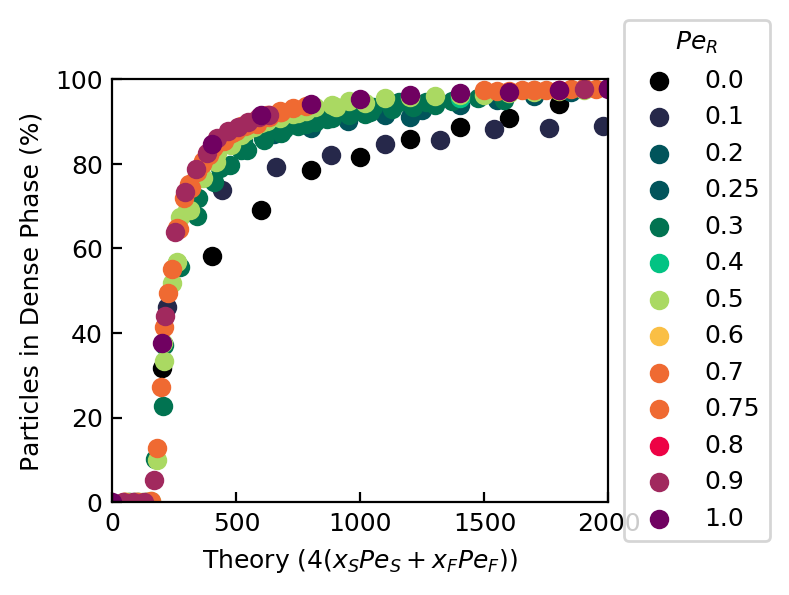

In [22]:
# Total dense phase composition
for i in xrange(numFiles):
#     if params['peR'][i] != 0.1:
    plt.scatter(params['theoryDenom'][i], SS['Dense_tot'][i],
                c=getCol(params['peR'][i]),
                label=str(params['peR'][i])
               )


handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc=7, bbox_to_anchor=(1.35, 0.525), title=r'$Pe_{R}$')
plt.xlim(0, 2000)
plt.ylim(0, 100)
plt.xlabel(r'Theory $\left(4(x_{S}Pe_{S} + x_{F}Pe_{F})\right)$')
plt.ylabel(r'Particles in Dense Phase (%)')

Text(0,0.5,'Particles in Dense Phase (%)')

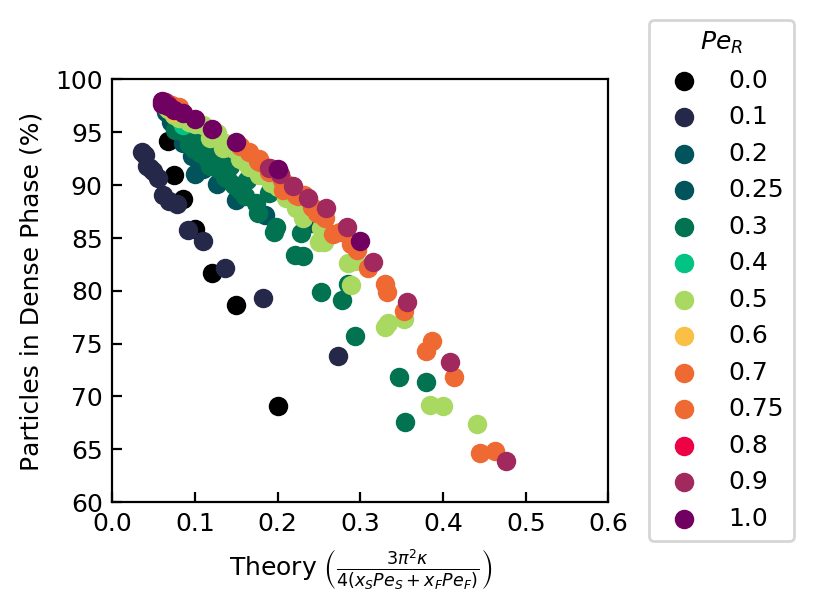

In [17]:
# Total dense phase composition
for i in xrange(numFiles):
#     if params['peR'][i] != 0.1:
    plt.scatter(params['theory'][i], SS['Dense_tot'][i],
                c=getCol(params['peR'][i]),
                label=str(params['peR'][i])
               )

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc=7, bbox_to_anchor=(1.40, 0.525), title=r'$Pe_{R}$')
plt.xlim(0, 0.6)
plt.ylim(60, 100)
plt.xlabel(r'Theory $\left(\frac{3\pi^{2}\kappa}{4(x_{S}Pe_{S} + x_{F}Pe_{F})}\right)$')
plt.ylabel(r'Particles in Dense Phase (%)')

(0, 50)

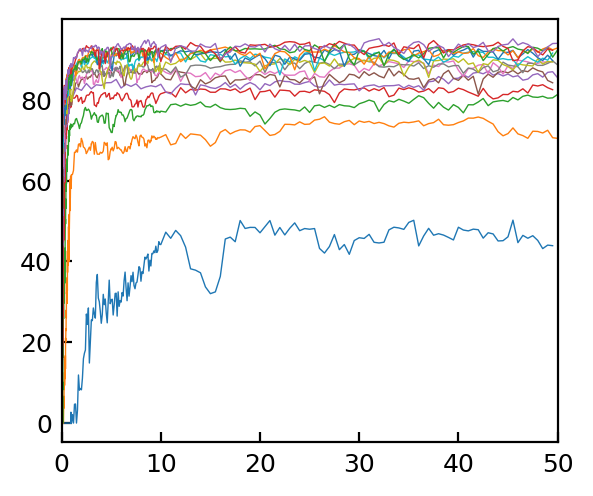

In [18]:
for i in xrange(numFiles):
    if params['peR'][i] == 0.1:
        plt.plot(all_sims[i]['Timestep'][:] / params['brownTime'][i],
                 all_sims[i]['Dense_tot'][:] / params['partAll'][i] * 100.0)
plt.xlim(0, 50)

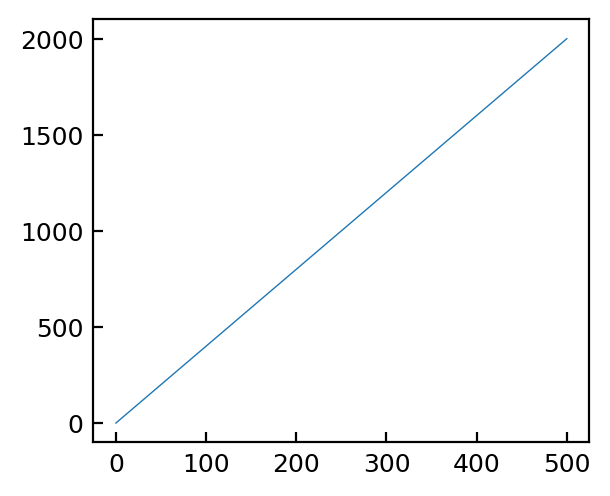

In [19]:
# Hmmmm... what are the upper and lower bounds? 
# Monodisperse and active/passive at evenly distributed 'net activity'

acts = np.arange(0, 500, 0.01)
denoms = np.zeros_like(acts)
for i in xrange(len(acts)):
    denoms[i] = theoryDenom(100.0, acts[i], 0.0)
    
plt.plot(acts, denoms)


(0, 2000)

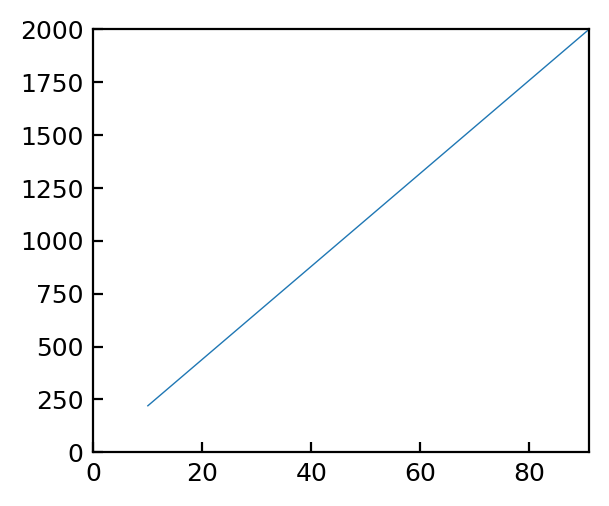

In [20]:
# Let's do the same thing for PeR = 0.1
actS = np.arange(10, 500, 0.01)
actF = np.zeros_like(actS)
denoms = np.zeros_like(actS)
for i in xrange(len(actS)):
    actF[i] = actS[i] * 10
    denoms[i] = theoryDenom(50.0, actS[i], actF[i])
plt.plot(actS, denoms)
plt.xlim(0, 91)
plt.ylim(0, 2000)

In [21]:
# Is the radius okay?
for i in xrange(numFiles):
    plt.scatter(params['theoryDenom'][i], SS['sigALL'][i])

In [39]:
# Total dense phase composition
fig, ax = plt.subplots(1, 3, figsize=(7, 2))
for i in xrange(numFiles):
#     if params['peR'][i] != 0.1:
    ax[0].scatter(params['theoryDenom'][i], SS['Dense_tot'][i],
                c=getCol(params['peR'][i]),
                label=str(params['peR'][i])
               )
    if params['xA'][i] != 0:
        ax[1].scatter(params['theoryDenom'][i], SS['Dense_A'][i],
                    c=getCol(params['peR'][i]),
                    label=str(params['peR'][i])
                   )
    if params['xA'][i] != 100:
        ax[2].scatter(params['theoryDenom'][i], SS['Dense_B'][i],
                    c=getCol(params['peR'][i]),
                    label=str(params['peR'][i])
                   )

ax[0].set_xlim(0, 2000)
ax[1].set_xlim(0, 2000)
ax[2].set_xlim(0, 2000)
ax[0].set_ylim(50, 100)
ax[1].set_ylim(50, 100)
ax[2].set_ylim(50, 100)
ax[1].tick_params(labelleft=False)
ax[2].tick_params(labelleft=False)
    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc=7, bbox_to_anchor=(1.65, 0.525), title=r'$Pe_{R}$')
ax[1].set_xlabel(r'Theory $\left(4(x_{S}Pe_{S} + x_{F}Pe_{F})\right)$')
ax[0].set_ylabel(r'Particles in Dense Phase (%)')

ax[0].set_title(r'All Particles')
ax[1].set_title(r'Slow Particles')
ax[2].set_title(r'Fast Particles')

Text(0.5,1,'Fast Particles')

In [41]:
xas = []
pes = []
pef = []
for i in xrange(numFiles):
    if params['peR'][i] == 0.0:
        xas.append(params['xA'][i])
        pes.append(params['peA'][i])
        pef.append(params['peB'][i])
        
print(xas)
print(pes)
print(pef)

[10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0]
